In [1]:
import cirq
import matplotlib.pyplot as plt

In [2]:
def prepare_initial_state(qubits, zbasis):
    instructions = []
    for i, qubit in enumerate(qubits):
        if zbasis[i] == 1:
            instructions.append(cirq.X(qubit))
    return instructions

In [3]:
def join_array_to_string(array):
    return ''.join([str(int(i)) for i in array])

In [4]:
def superdense(x):
    e1 = cirq.NamedQubit('e1')
    e2 = cirq.NamedQubit('e2')
    a  = cirq.NamedQubit('a')
    b  = cirq.NamedQubit('b')

    circuit = cirq.Circuit(
        cirq.Moment(*prepare_initial_state([e1, e2], x)),
        cirq.H(a), cirq.CNOT(a, b),
        cirq.CZ(e1, a), cirq.CNOT(e2, a),
        cirq.CNOT(a, b),
        cirq.H(a),
        cirq.measure(a, b, key='m')
    )
    sim = cirq.Simulator()
    result = sim.run(circuit, repetitions=1)
    return circuit, result.histogram(key='m', fold_func=join_array_to_string)

In [5]:
circuit, _ = superdense([0, 1])
print(circuit)

a: ────H───@───@───X───@───H───M('m')───
           │   │   │   │       │
b: ────────X───┼───┼───X───────M────────
               │   │
e1: ───────────@───┼────────────────────
                   │
e2: ───X───────────@────────────────────


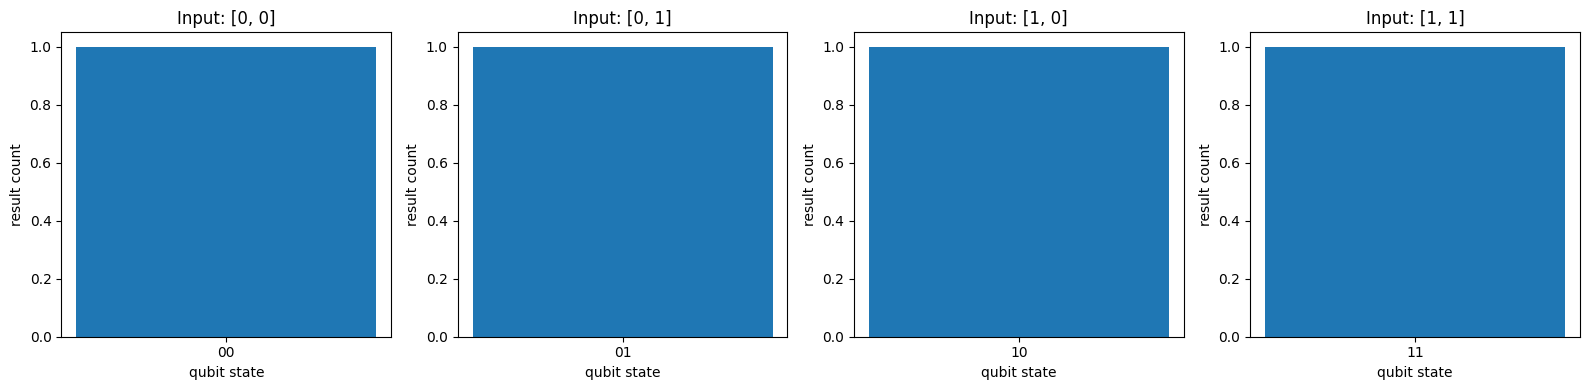

In [6]:
states = [
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]

fig, ax = plt.subplots(1,4, figsize=(16, 4))
for i, state in enumerate(states):
    _, res = superdense(state)
    cirq.plot_state_histogram(res, ax=ax[i])
    ax[i].set_title(f'Input: {state}')
plt.tight_layout()
plt.show()